In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Funzione ecdf() per la CDF (from previous)     ------ >     ECDF- Empirical cumulative distributed function

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]


# Statistical inference
When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it.

In [3]:
df1 = pd.read_csv('datasetUno.csv')

print(df1.head())

   mid_parent  mid_offspring
0      8.3318         8.4190
1      8.4035         9.2468
2      8.5317         8.1532
3      8.7202         8.0089
4      8.7089         8.2215


     Country  Continent  female literacy  fertility     population
0       Chine       ASI             90.5      1.769  1,324,655,000
1        Inde       ASI             50.8      2.682  1,139,964,932
2         USA       NAM             99.0      2.077    304,060,000
3  IndonÃ©sie       ASI             88.8      2.132    227,345,082
4     BrÃ©sil       LAT             90.2      1.827    191,971,506


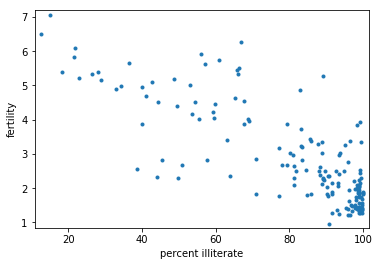

-0.8041324026815341


In [7]:
df2 = pd.read_csv('female.csv')

print(df2.head())

illiteracy = df2['female literacy']
fertility = df2['fertility']

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))


# Linear regression

We will assume that fertility is a linear function of the female illiteracy rate. That is, f=ai+b, where a is the slope and b is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using np.polyfit().

slope = -0.049798548090634234 children per woman / percent illiterate
intercept = 6.8679054196999765 children per woman


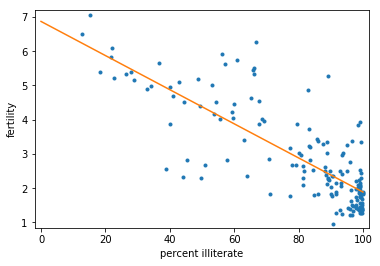

In [8]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


# How is it optimal?
The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

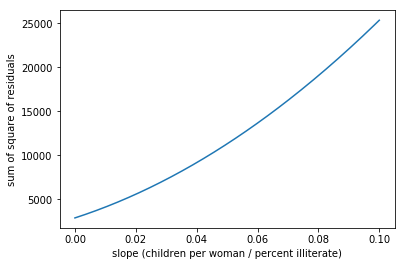

In [9]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


       x      y   x.1   y.1   x.2    y.2   x.3    y.3
0   10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1    8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2   13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3    9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4   11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5   14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6    6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7    4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8   12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9    7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10   5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

Slope: 0.5000909090909095 , Intercept: 3.0000909090909076


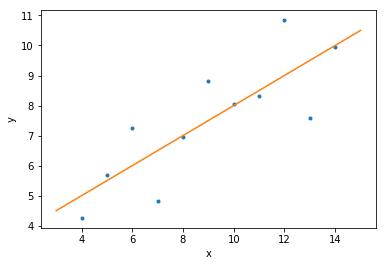

In [20]:
df3 = pd.read_csv('anscombe.csv', skiprows=[0])    # Per avere un buon header

print(df3)

x = df3['x']
y = df3['y']

# Perform linear regression: a, b
# a slope
# b intercept
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print()
print('Slope:', a, ', Intercept:', b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()
